In [7]:
import shap
import joblib
import pandas as pd
shap.initjs()
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
best_lgbm=joblib.load("/content/tuned_lgbm_model.pkl")
X_test = pd.read_csv("/content/X_test.csv")
y_test = pd.read_csv("/content/y_test.csv")
X_train= pd.read_csv("/content/X_train.csv")
explainer=shap.TreeExplainer(best_lgbm)
shap_values = explainer.shap_values(X_test)


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:586: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


GLOBAL EXPLANATION

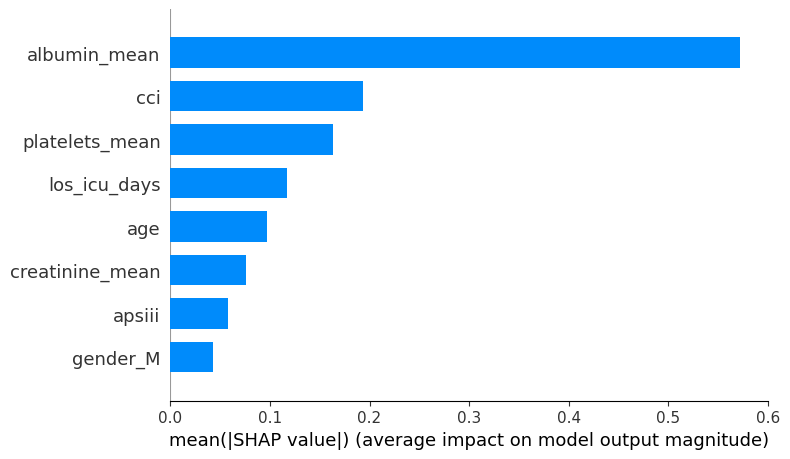

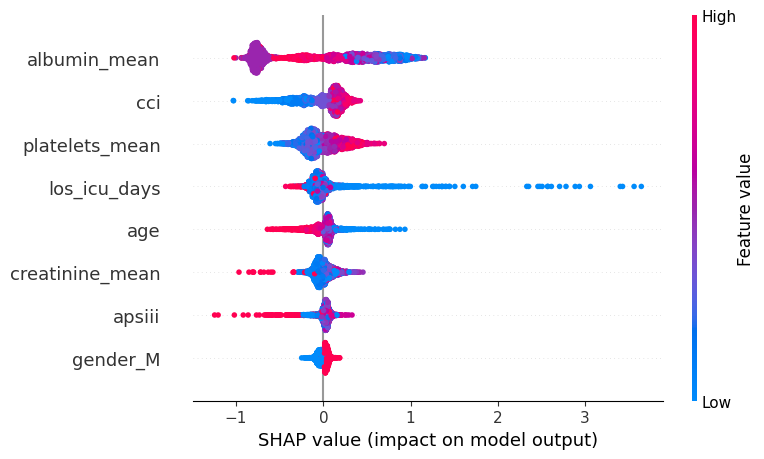

In [3]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)

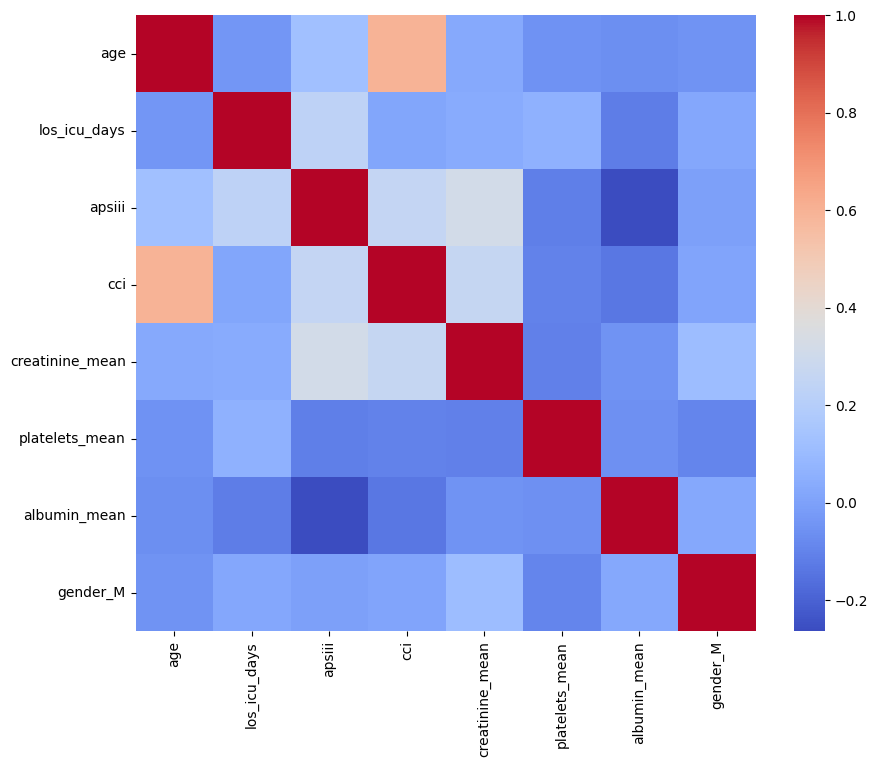

In [8]:
corr = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.show()

In [9]:
X_train.corr()['albumin_mean'].sort_values(ascending=False)

,albumin_mean
albumin_mean,1.000000
gender_M,0.024137
creatinine_mean,-0.051370
platelets_mean,-0.058627
age,-0.064990
los_icu_days,-0.120652
cci,-0.140476
apsiii,-0.264267


LOCAL EXPLANATION WITH WATERFALLPLOT

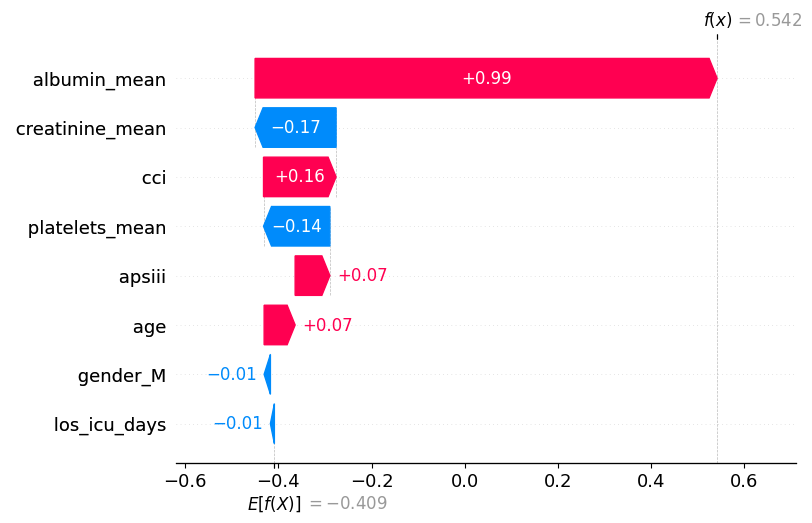

In [14]:
shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,
    shap_values[120],
    X_test.iloc[120]
)
